In [9]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import contextily as ctx
import geopandas as gpd

# Replace 'your_api_key' with your actual API key
api_key = 'd85093f99a005c8686b89077d8d8a18f'
# Replace 'city_name' with the city you want to get weather data for
city_name = [
    "New York",
    "Los Angeles",
    "Chicago",
    "Houston",
    "Phoenix",
    "Philadelphia",
    "San Antonio",
    "San Diego",
    "Dallas",
    "San Jose",
    "Austin",
    "Jacksonville",
    "Fort Worth",
    "Columbus",
    "Charlotte",
    "San Francisco",
    "Indianapolis",
    "Seattle",
    "Denver",
    "Washington",
    "Boston",
    "El Paso",
    "Nashville",
    "Detroit",
    "Oklahoma City",
    "Portland",
    "Las Vegas",
    "Memphis",
    "Louisville",
    "Baltimore"
]

w_data=[]

for i in city_name:

  # Construct the URL
  base_url=f"http://api.openweathermap.org/data/2.5/weather?q={i}&appid={api_key}&units=metric%27"

  # Make a request to the API
  response = requests.get(base_url)

  # Check the response status code
  if response.status_code == 200:
      # Parse JSON data
      data = response.json()

      # Extract relevant data
      main = data['main']
      weather = data['weather'][0]
      wind = data['wind']

      city = i
      temp = main['temp']
      humidity = main['humidity']
      pressure = main['pressure']
      weather = weather['description']
      windspeed = wind['speed']
      log = data['coord']['lon']
      lat = data['coord']['lat']

      w_data.append({
          "City":city,
          "Temperature":temp,
          "Humidity":humidity,
          "Pressure":pressure,
          "Weather":weather,
          "Wind Speed":windspeed,
          "longitude":log,
          "latitude":lat
      })

  else:
      # Print the error message
      print(f"Error: {response.status_code}, {response.reason}")

df = pd.DataFrame(w_data)
df

,City,Temperature,Humidity,Pressure,Weather,Wind Speed,longitude,latitude
0,New York,287.14,93,1009,light rain,6.69,-74.0060,40.7143
1,Los Angeles,286.98,66,1017,mist,0.00,-118.2437,34.0522
2,Chicago,283.55,80,1012,broken clouds,4.63,-87.6500,41.8500
3,Houston,292.81,96,1015,light rain,1.68,-95.3633,29.7633
4,Phoenix,290.04,24,1015,broken clouds,1.54,-112.0740,33.4484
5,Philadelphia,287.87,96,1010,light rain,4.02,-75.1638,39.9523
6,San Antonio,291.40,77,1016,clear sky,2.57,-98.4936,29.4241
7,San Diego,285.60,72,1017,mist,3.09,-117.1573,32.7153
8,Dallas,286.85,73,1017,clear sky,3.09,-96.7836,32.7668
9,San Jose,284.92,76,1017,clear sky,3.60,-121.8950,37.3394


C:\Users\RAJ\AppData\Local\Temp\ipykernel_18360\291933511.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


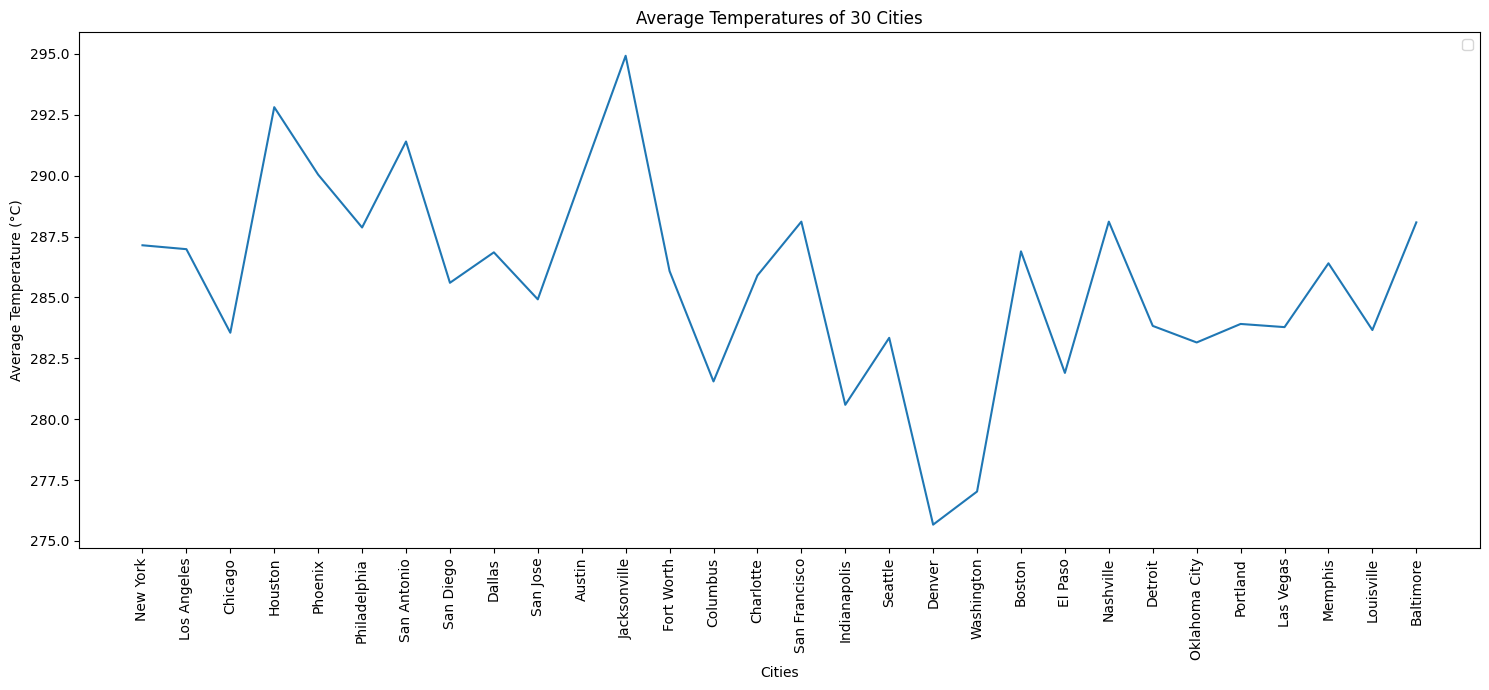

In [10]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='City', y='Temperature', data=df)
# Adding title and labels
plt.title('Average Temperatures of 30 Cities')
plt.xlabel('Cities')
plt.ylabel('Average Temperature (°C)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
df.describe()

,Temperature,Humidity,Pressure,Wind Speed,longitude,latitude
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,285.667000,79.566667,1013.533333,2.915000,-97.620943,37.181463
std,4.149935,17.694112,4.569263,1.674006,16.754894,5.057548
min,275.670000,24.000000,1001.000000,0.000000,-122.676200,29.424100
25%,283.577500,73.750000,1011.250000,1.627500,-114.371400,32.937200
50%,285.990000,86.000000,1015.000000,2.885000,-97.052200,36.757200
75%,288.027500,92.000000,1016.750000,3.915000,-83.724200,39.958975
max,294.920000,96.000000,1019.000000,6.690000,-71.059800,47.606200


C:\Users\RAJ\AppData\Local\Temp\ipykernel_18360\3563033918.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


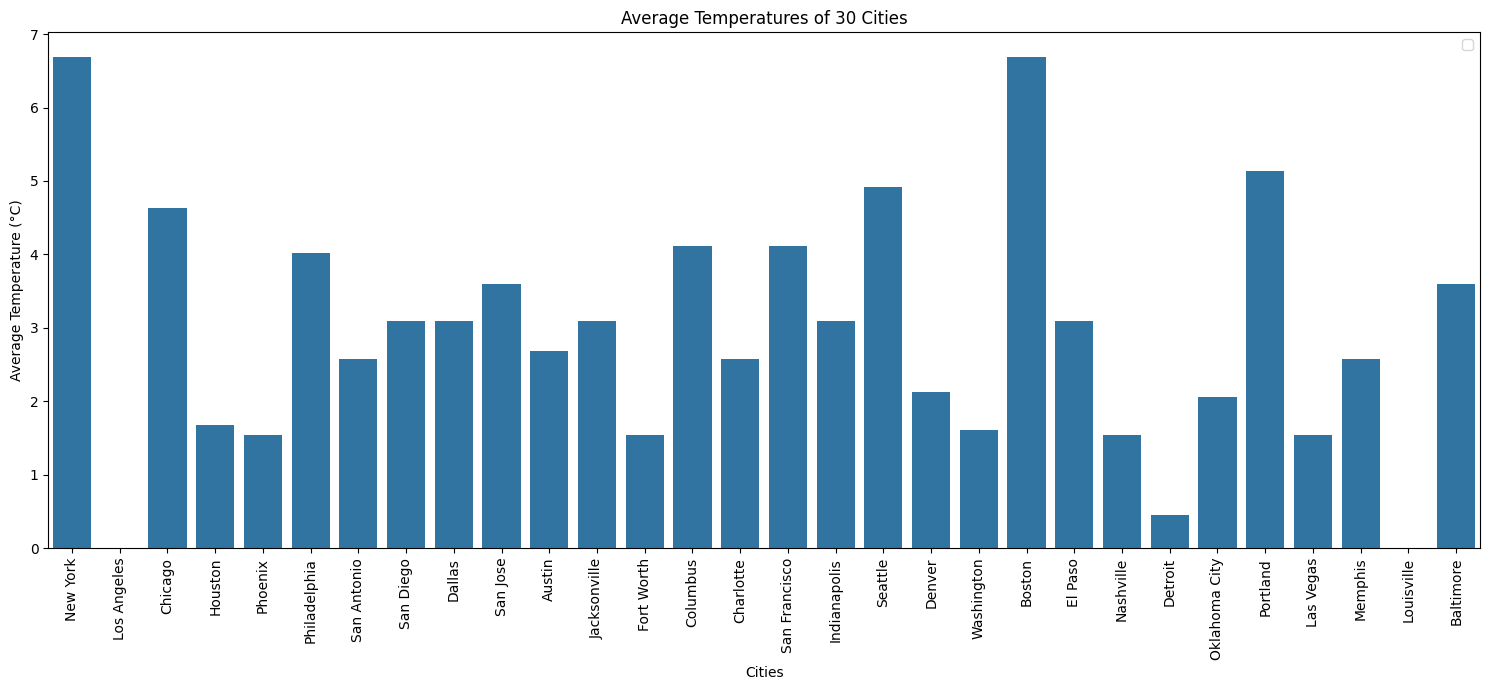

In [12]:
plt.figure(figsize=(15, 7))
sns.barplot(x='City', y='Wind Speed', data=df)
# Adding title and labels
plt.title('Average Temperatures of 30 Cities')
plt.xlabel('Cities')
plt.ylabel('Average Temperature (°C)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

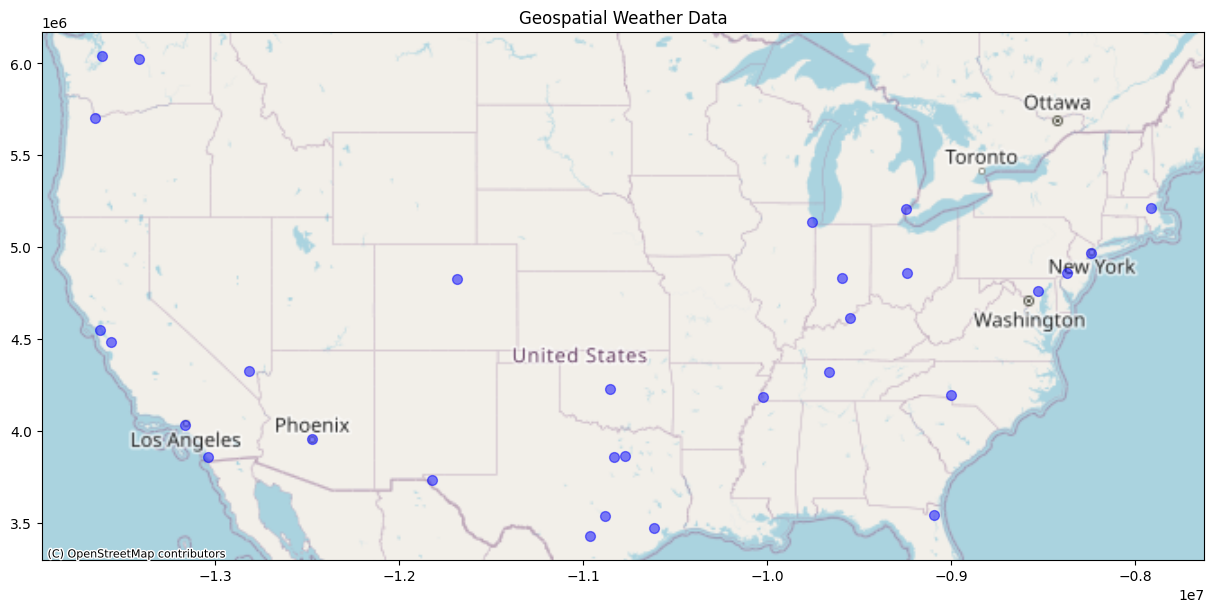

In [13]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf = gdf.set_crs(epsg=4326).to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, color='blue', markersize=50, alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Geospatial Weather Data')
plt.show()

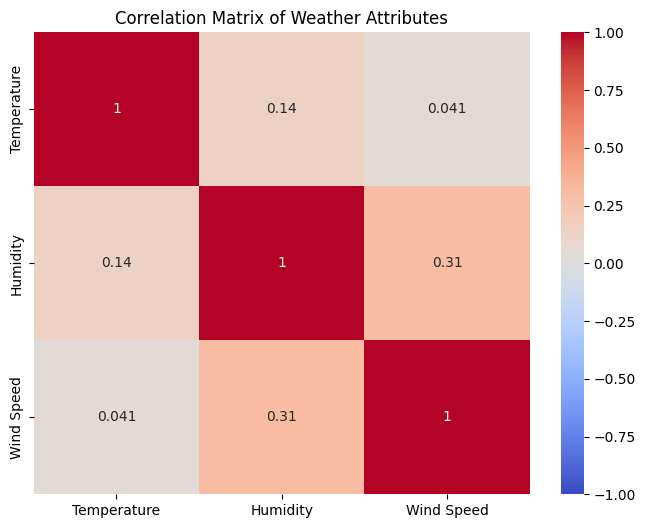

In [14]:
corr_matrix = df[['Temperature', 'Humidity', 'Wind Speed']].corr()

# Step 4: Visualize Relationships - Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weather Attributes')
plt.show()